# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_float

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage.morphology import disk
from skimage import filters
from skimage.filters import rank

from skimage import measure
from skimage.measure import label
from skimage.measure import regionprops

from skimage import draw

from matplotlib import cm

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

Text(0.5,1,'Disk 3')

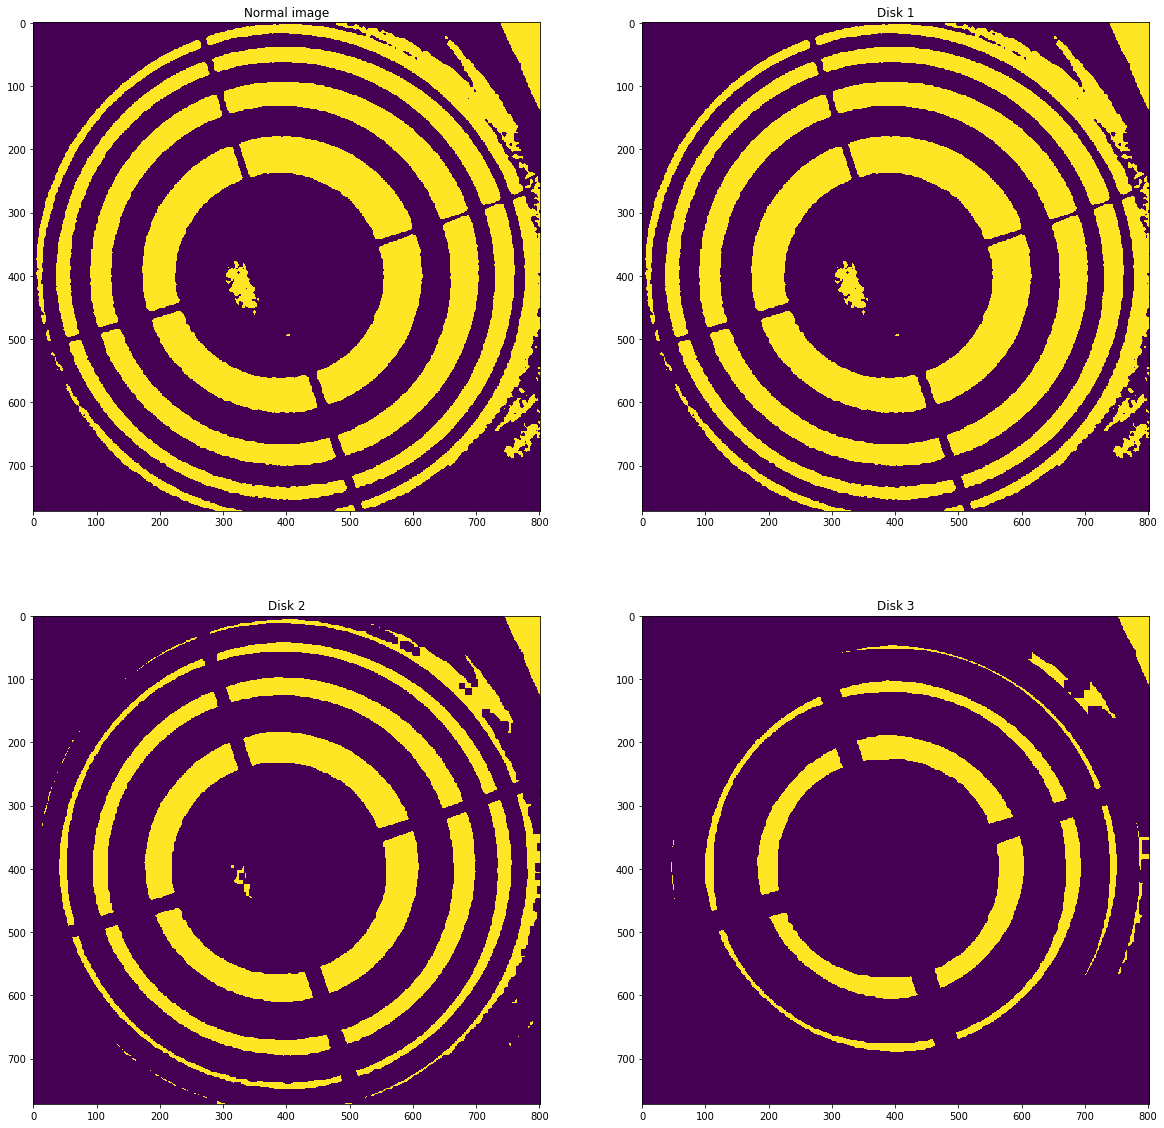

In [2]:
img_path = './images/'
img_name = 'FindingContours.png'
img = io.imread(img_path.__add__(img_name))

f,axes = plt.subplots(nrows = 2,ncols = 2, figsize=(20,20))
ax = axes.ravel()

squa1 = morphology.square(1)
squa10 = morphology.square(10)
squa20 = morphology.square(20)

d1 = morphology.erosion(img, squa1)
d10 = morphology.erosion(img, squa10)
d20 = morphology.erosion(img, squa20)

ax[0].imshow(img)
ax[0].set_title('Normal image')
ax[1].imshow(d1)
ax[1].set_title('Disk 1')
ax[2].imshow(d10)
ax[2].set_title('Disk 2')
ax[3].imshow(d20)
ax[3].set_title('Disk 3')

** Q.1.2 Dilation **

Text(0.5,1,'Disk 3')

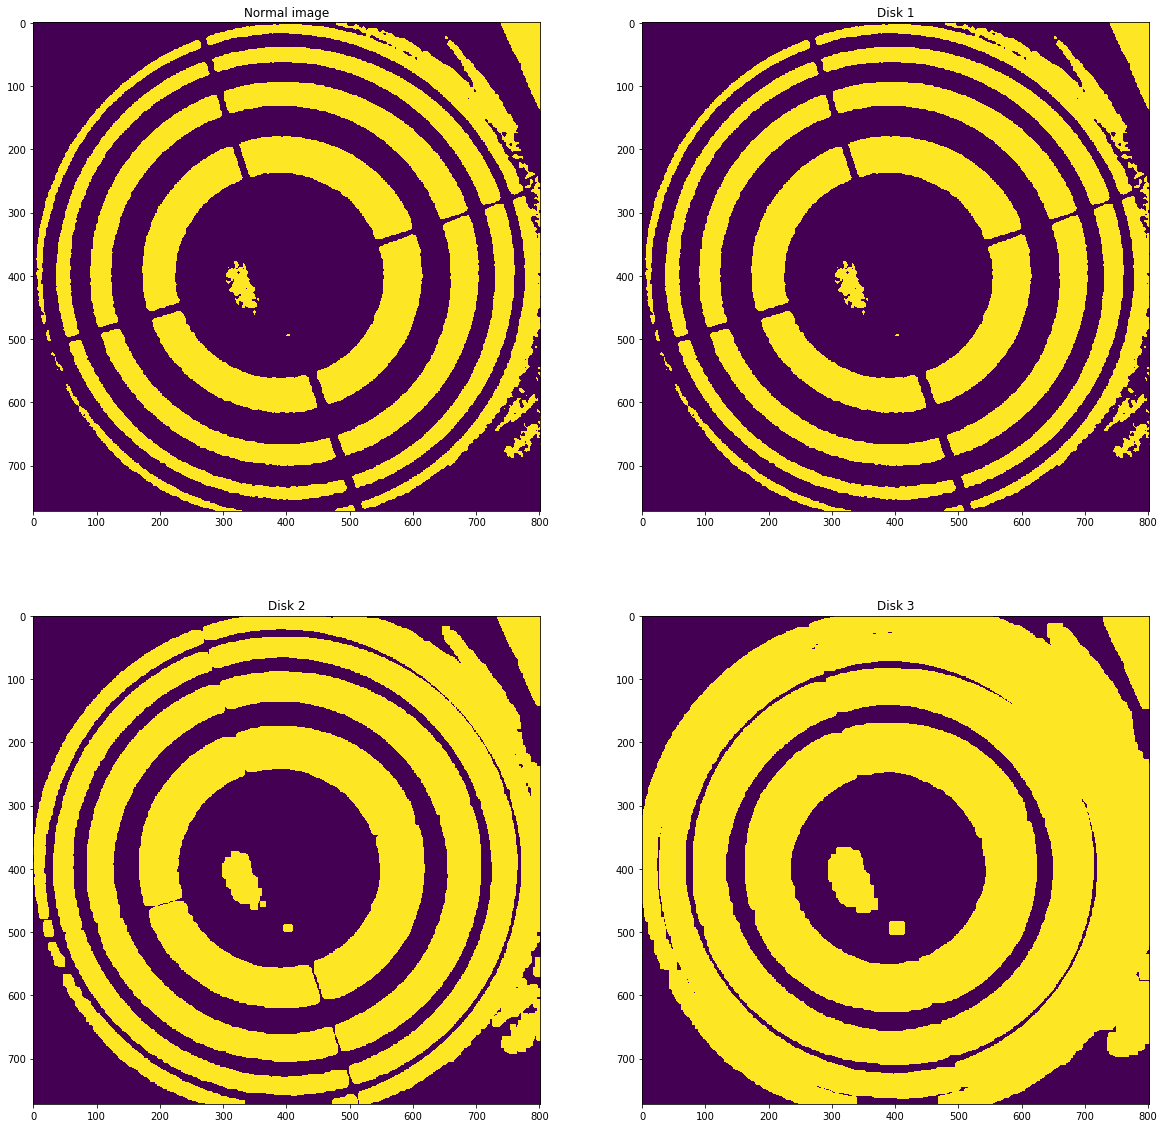

In [3]:
f,axes = plt.subplots(nrows = 2,ncols = 2, figsize=(20,20))
ax = axes.ravel()

squa1 = morphology.square(1)
squa10 = morphology.square(10)
squa20 = morphology.square(20)

d1 = morphology.dilation(img, squa1)
d10 = morphology.dilation(img, squa10)
d20 = morphology.dilation(img, squa20)

ax[0].imshow(img)
ax[0].set_title('Normal image')
ax[1].imshow(d1)
ax[1].set_title('Disk 1')
ax[2].imshow(d10)
ax[2].set_title('Disk 2')
ax[3].imshow(d20)
ax[3].set_title('Disk 3')

** Q.1.3 Opening **

Text(0.5,1,'Disk 3')

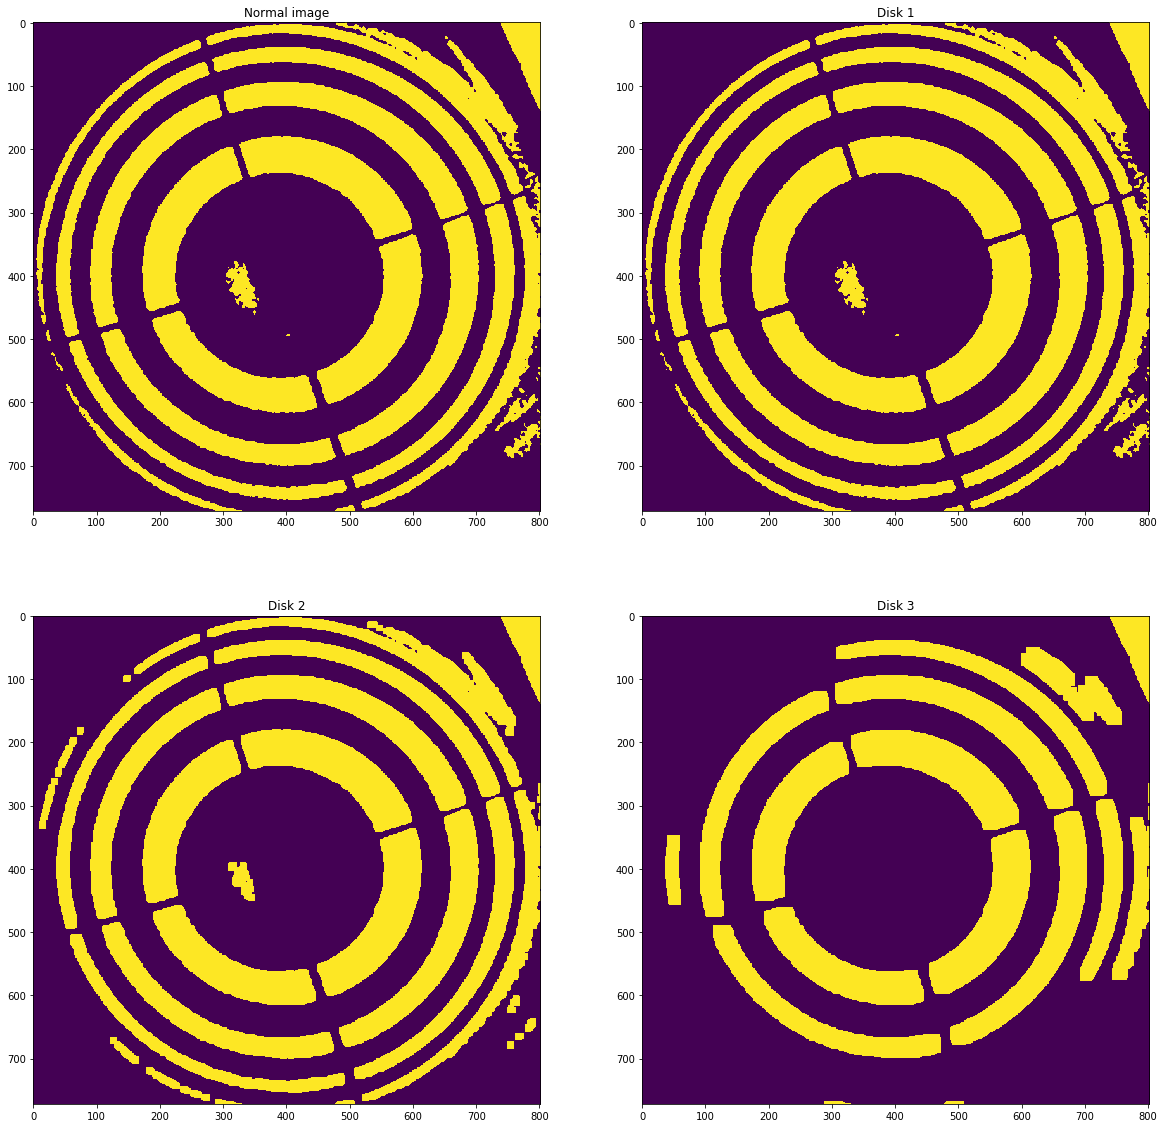

In [4]:
f,axes = plt.subplots(nrows = 2,ncols = 2, figsize=(20,20))
ax = axes.ravel()

squa1 = morphology.square(1)
squa10 = morphology.square(10)
squa20 = morphology.square(20)

d1 = morphology.opening(img, squa1)
d10 = morphology.opening(img, squa10)
d20 = morphology.opening(img, squa20)

ax[0].imshow(img)
ax[0].set_title('Normal image')
ax[1].imshow(d1)
ax[1].set_title('Disk 1')
ax[2].imshow(d10)
ax[2].set_title('Disk 2')
ax[3].imshow(d20)
ax[3].set_title('Disk 3')

** Q.1.4 Closing**

Text(0.5,1,'Disk 3')

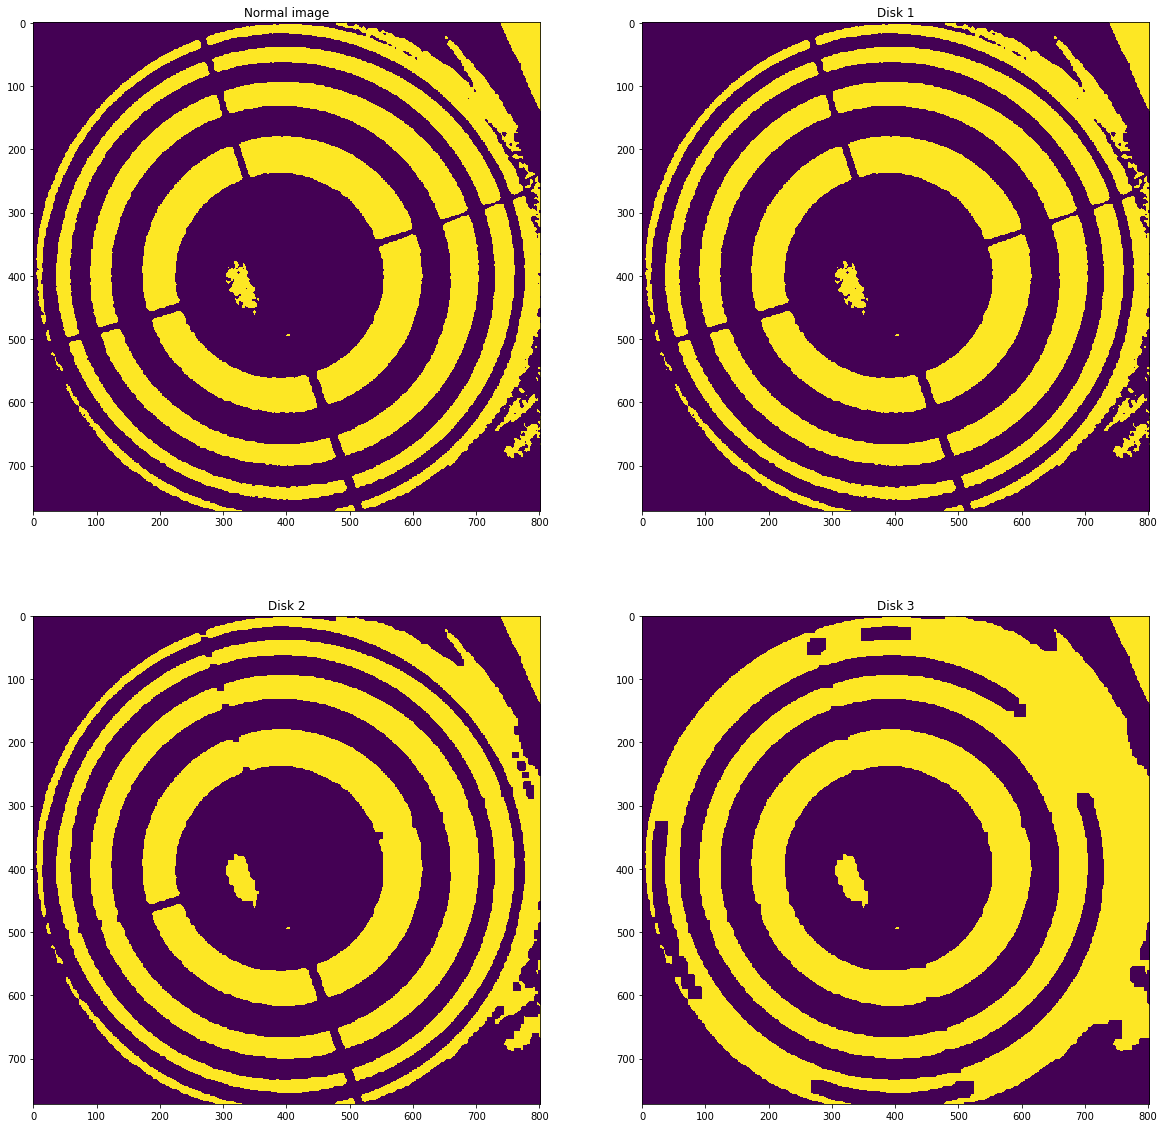

In [5]:
f,axes = plt.subplots(nrows = 2,ncols = 2, figsize=(20,20))
ax = axes.ravel()

squa1 = morphology.square(1)
squa10 = morphology.square(10)
squa20 = morphology.square(20)

d1 = morphology.closing(img, squa1)
d10 = morphology.closing(img, squa10)
d20 = morphology.closing(img, squa20)

ax[0].imshow(img)
ax[0].set_title('Normal image')
ax[1].imshow(d1)
ax[1].set_title('Disk 1')
ax[2].imshow(d10)
ax[2].set_title('Disk 2')
ax[3].imshow(d20)
ax[3].set_title('Disk 3')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

#Explanation:

#- The erosion will shrinks dark region and reduces the shining ones.
#- The dilatation makes the exacte inverse of erosion.
#- The closing tends to “close” up dark region gaps between bright features.
#- The opening makes the exact reverse of the closing


## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/kevin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


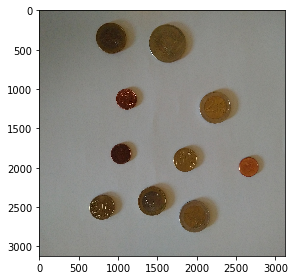

In [6]:
from skimage.transform import resize

img_path = './images/'
img_name = 'coins.jpg'
img = io.imread(img_path.__add__(img_name))

img = img_as_ubyte(img)

imgR = resize(img,(img.shape[0]/4,img.shape[1]/4))

io.imshow(img)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

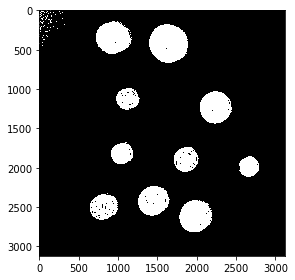

In [7]:
from skimage.transform import resize

img_path = './images/'
img_name = 'coins.jpg'
img = io.imread(img_path.__add__(img_name),as_grey = True)

coinf1 = filters.threshold_otsu(img)
binar = img <=coinf1

io.imshow(binar)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

Text(0.5,1,'Closing')

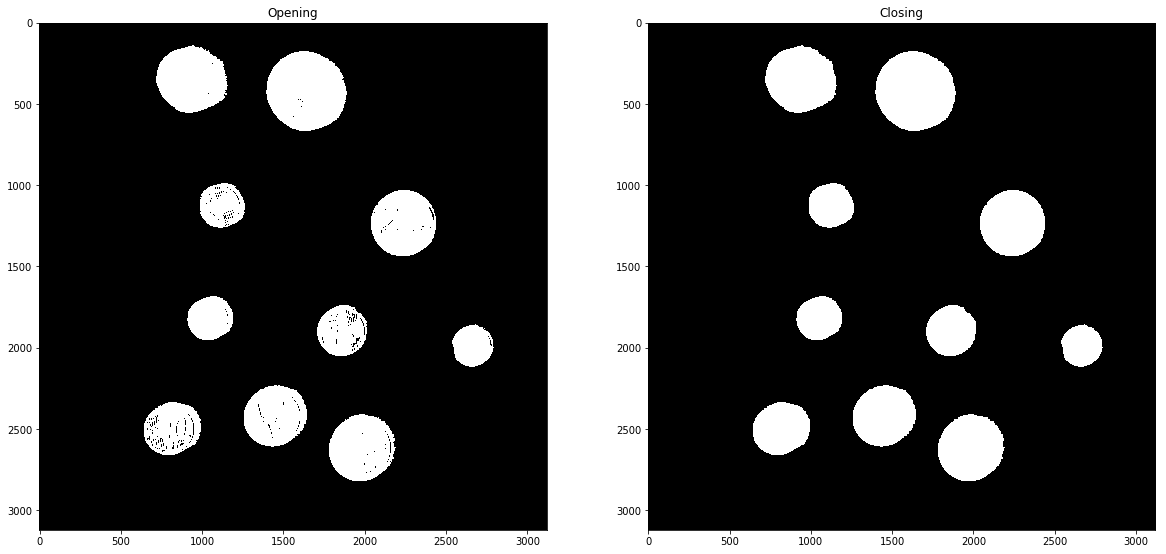

In [8]:
f,axes = plt.subplots(nrows = 1,ncols = 2, figsize=(20,20))
ax = axes.ravel()

squa1 = morphology.square(7)
squa2 = morphology.square(16)

openi = morphology.opening(binar, squa1)
closi = morphology.closing(openi, squa2)

ax[0].imshow(openi, cmap = cm.gray)
ax[0].set_title('Opening')
ax[1].imshow(closi, cmap = cm.gray)
ax[1].set_title('Closing')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


/home/kevin/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/kevin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


11


Text(0.5,1,'Perimeters')

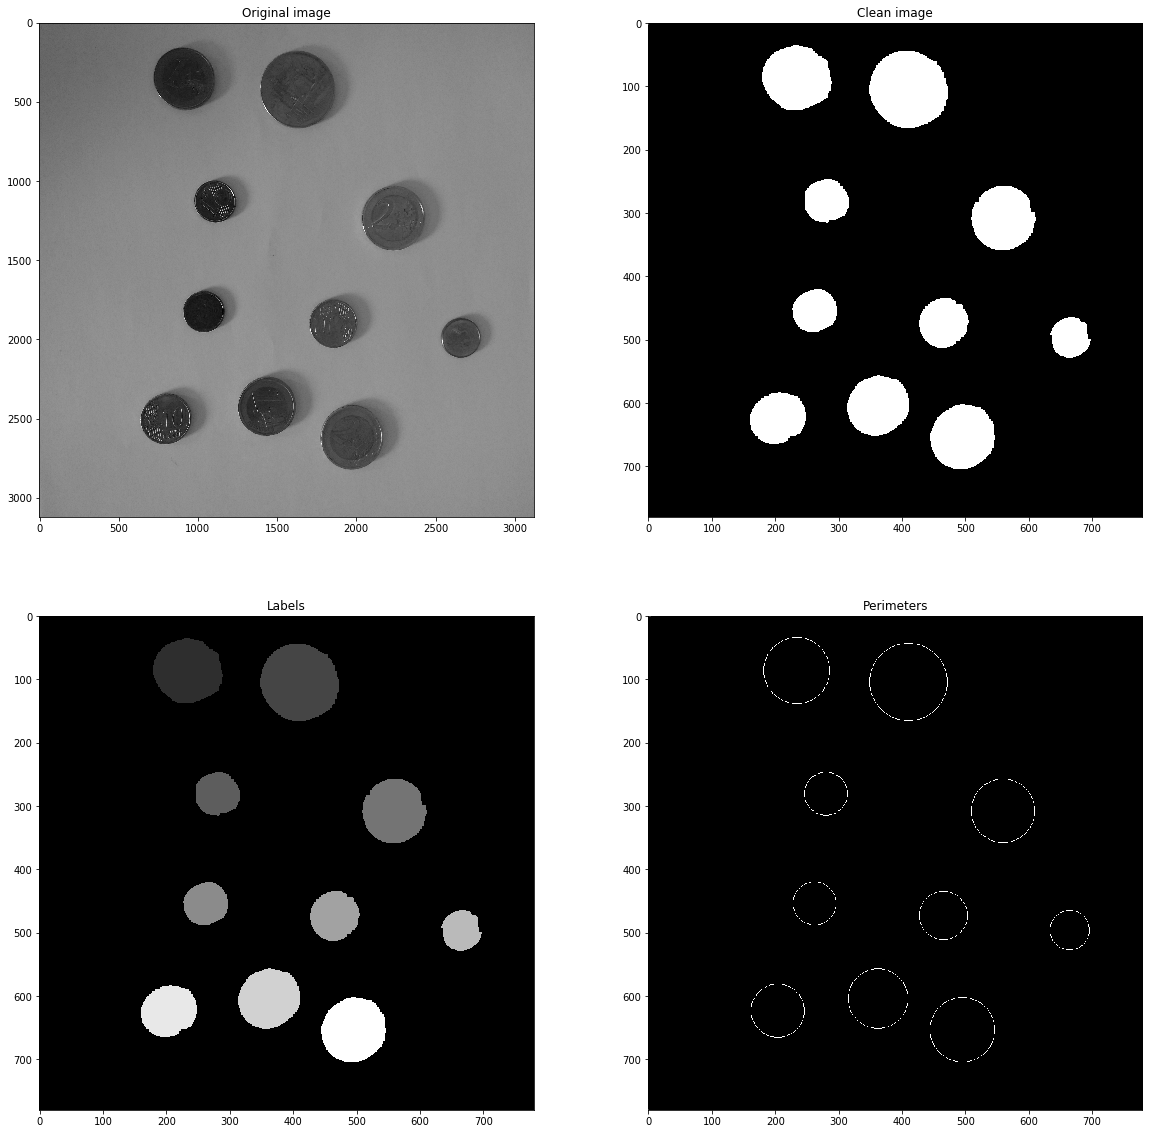

In [11]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Im = io.imread('./images/coins.jpg',as_grey = True)
ImF = img_as_ubyte(Im)

ImR = resize(ImF, (ImF.shape[0] / 4, ImF.shape[1] / 4))

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')

thresh = filters.threshold_otsu(ImR)
binary = ImR <= thresh

ImE4 = morphology.opening(binary, morphology.square(4))
ImE4 = morphology.closing(ImE4, morphology.square(15))

ax[1].imshow(ImE4, cmap = cm.gray)
ax[1].set_title('Clean image')

(ImLabel, Numb) = measure.label(ImE4, return_num=True)
ax[2].imshow(ImLabel, cmap = cm.gray)
ax[2].set_title('Labels')
print(Numb)

ImageProperties = measure.regionprops(ImLabel)

Area = np.zeros((ImE4.shape[0], ImE4.shape[1]),dtype=np.uint8)
for region in ImageProperties:
    peri = region.equivalent_diameter
    (x,y) = region.centroid
    Z = draw.circle_perimeter(int(x), int(y), int(peri/2))
    Area[Z] = 1
    
    
ax[3].imshow(Area, cmap = cm.gray)
ax[3].set_title('Perimeters')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 